### Machine Failure Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('MachineFailure_train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.shape

(136429, 14)

### Step 2: Check the missing values

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Step 3: Seperate X and Y (drop significantly insignificant columns)

In [6]:
X = df.drop(columns=['id', 'Product ID','Machine failure'],axis=1)
Y = df[['Machine failure']]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

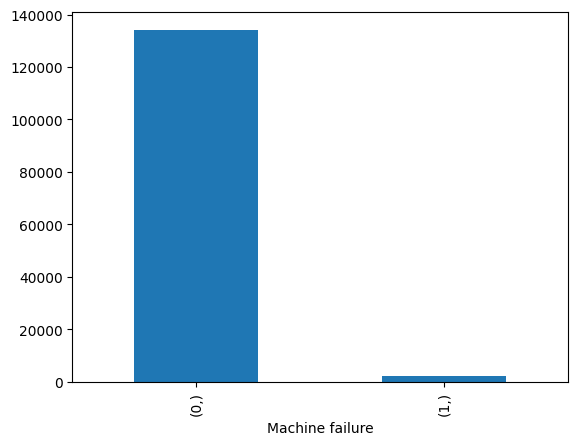

In [10]:
Y.value_counts().plot(kind = 'bar')

### Step 4: Separate Cat and Con features on X 

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Step 5: Create a pipeline for feature selection

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler 

In [15]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('Scaler',StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                           ('cat',cat_pipe,cat)])

In [16]:
X_pre= pre.fit_transform(X)

In [17]:
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [19]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Check Mutual Information Score

In [20]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(X_pre,Y)
imp

array([0.00539346, 0.00159949, 0.01905385, 0.01965104, 0.00683708,
       0.00752011, 0.02443148, 0.01135858, 0.01894877, 0.00178459,
       0.01027672])

In [21]:
imp = pd.Series(imp)
imp.index = X_pre.columns
imp = imp.sort_values(ascending=False)
imp

num__HDF                        0.024431
num__Torque [Nm]                0.019651
num__Rotational speed [rpm]     0.019054
num__OSF                        0.018949
num__PWF                        0.011359
cat__Type                       0.010277
num__TWF                        0.007520
num__Tool wear [min]            0.006837
num__Air temperature [K]        0.005393
num__RNF                        0.001785
num__Process temperature [K]    0.001599
dtype: float64

<Axes: title={'center': 'Importance Rate'}>

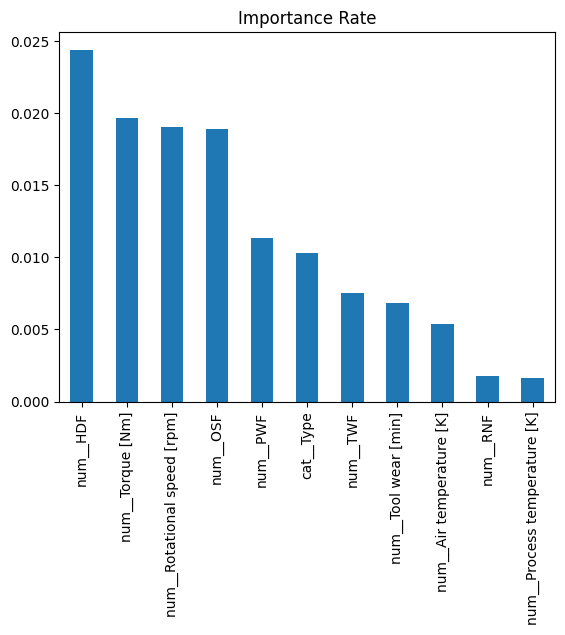

In [22]:
imp.plot(kind='bar',title='Importance Rate')

### Step 7. Build the final sklearn pipeline (Onehotencoder)

In [23]:
cat

['Type']

In [24]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
num_pipe1= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('Scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('OHE',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe1,con),
                          ('cat',cat_pipe1,cat)])

In [27]:
X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
cols2 = pre2.get_feature_names_out()
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [29]:
X_pre2 = pd.DataFrame(X_pre2,columns=cols2)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Step 8: Train - test Split

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre2,Y,test_size=0.2,random_state=21)

In [31]:
xtrain.shape

(109143, 13)

In [32]:
xtest.shape

(27286, 13)

In [33]:
ytrain.value_counts()

Machine failure
0                  107426
1                    1717
Name: count, dtype: int64

In [34]:
ytest.value_counts()

Machine failure
0                  26855
1                    431
Name: count, dtype: int64

### Step 9: Algorithm Evaluation to select the best model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
dct = {'LogisticRegression':LogisticRegression(),
       'GradientBoosting': GradientBoostingClassifier(),
       'DecisionTree': DecisionTreeClassifier(),
       'KNN':KNeighborsClassifier(),
       #'SVM':SVC()
       }

In [37]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('GradientBoosting', GradientBoostingClassifier()), ('DecisionTree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())])

In [38]:
dct.keys()

dict_keys(['LogisticRegression', 'GradientBoosting', 'DecisionTree', 'KNN'])

In [39]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
ts = []
tr_cv =[]
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    tr_f1 = f1_score(ytrain,ypred_tr)
    ts_f1 = f1_score(ytest,ypred_ts)
    cv_f1 = cross_val_score(model,xtrain,ytrain,cv =5, scoring='f1')
    cv_avg = cv_f1.mean()
    tr.append(tr_f1)
    ts.append(ts_f1)
    tr_cv.append(cv_avg)
    print(f'Model Name: {name}\n')
    print(f'Training F1: {tr_f1:.4f}')
    print(f'Testing F1: {ts_f1:.4f}')
    print(f'Training CV: {cv_avg:.4f}')
    print("\n=================================\n")



Model Name: LogisticRegression

Training F1: 0.8651
Testing F1: 0.8530
Training CV: 0.8640


Model Name: GradientBoosting

Training F1: 0.8735
Testing F1: 0.8519
Training CV: 0.8591


Model Name: DecisionTree

Training F1: 0.9956
Testing F1: 0.7589
Training CV: 0.7530


Model Name: KNN

Training F1: 0.8643
Testing F1: 0.8515
Training CV: 0.8600




In [40]:
eval_dct = {'model':list(dct.keys()),
            'training':tr,
            'testing':ts,
            'cv':tr_cv}

In [41]:
df_eval = pd.DataFrame(eval_dct)
df_eval.sort_values(by='cv',ascending=False)

,model,training,testing,cv
0,LogisticRegression,0.865113,0.852980,0.863962
3,KNN,0.864262,0.851459,0.859955
1,GradientBoosting,0.873451,0.851852,0.859061
2,DecisionTree,0.995620,0.758857,0.752997


### Tuning SVM

In [42]:
params = {'C':[0.01,0.1,1,10,50,100,1000]}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
LRG = LogisticRegression()
rscv = RandomizedSearchCV(LRG, param_distributions=params,cv=5, scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [44]:
rscv.best_params_

{'C': 0.01}

In [45]:
rscv.best_score_

0.8646854269720536

In [46]:
best_LRG = rscv.best_estimator_
best_LRG

LogisticRegression(C=0.01)

### step 9: Evaluate the model

In [47]:
ypred_tr = best_LRG.predict(xtrain)
ypred_ts = best_LRG.predict(xtest)

In [49]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [51]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [52]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


### Step 10: Confusion Matrix building

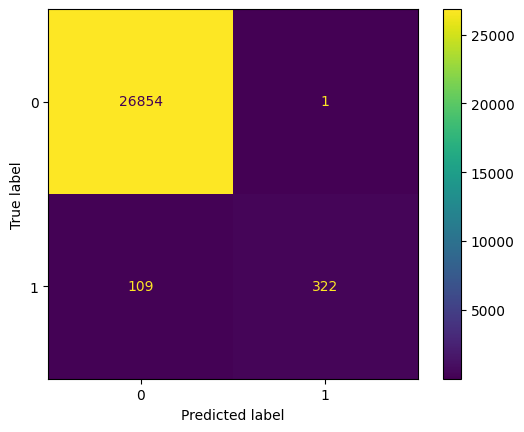

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_LRG.classes_)
cfd.plot()

### Step 11: Print Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       1.00      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Step 12: PLotting roc_auc curve

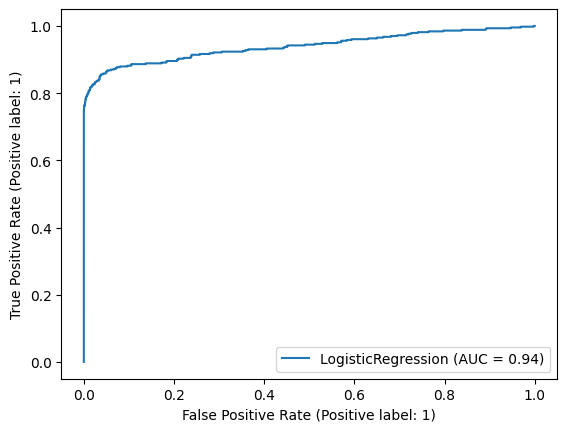

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_LRG, xtest, ytest)

### Step 13: Predict Testing Model

In [59]:
df2 = pd.read_csv('MachineFailure_test.csv')
df2.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [61]:
xnew = pre2.transform(df2)
xnew

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [62]:
xnew = pd.DataFrame(xnew,columns=cols2)
xnew

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


### Step 14:Predicting probabilities & Predictions

In [68]:
pred = best_LRG.predict(xnew)
prob = best_LRG.predict_proba(xnew)[:,-1]

In [64]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
prob

array([0.00299331, 0.00170086, 0.00316171, ..., 0.00298826, 0.00270557,
       0.00328019])

In [70]:
df_final = df2[['id']]
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [71]:
df_final['Machine_failure_pred'] = pred
df_final['Machin_failure_prob'] =prob

In [72]:
df_final.head()

,id,Machine_failure_pred,Machin_failure_prob
0,136429,0,0.002993
1,136430,0,0.001701
2,136431,0,0.003162
3,136432,0,0.003897
4,136433,0,0.004646


In [73]:
df_final['Machine_failure_pred'].value_counts()

Machine_failure_pred
0    89850
1     1104
Name: count, dtype: int64

<Axes: xlabel='Machine_failure_pred'>

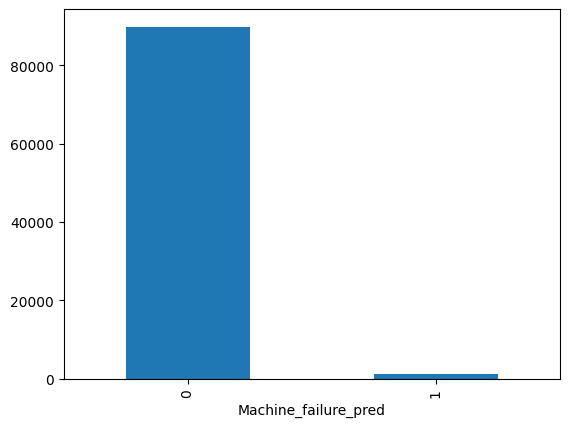

In [74]:
df_final['Machine_failure_pred'].value_counts().plot(kind='bar')

In [75]:
df_final[df_final['Machine_failure_pred']==1]

,id,Machine_failure_pred,Machin_failure_prob
17,136446,1,0.986613
209,136638,1,0.989652
223,136652,1,0.975613
397,136826,1,0.988344
405,136834,1,0.965493
...,...,...,...
90340,226769,1,0.978064
90503,226932,1,0.974284
90665,227094,1,0.994759
90784,227213,1,0.976210


### Step 15: Save data to CSV

In [76]:
df_final.to_csv('Machine Failure Predictions.csv',index=False)